Please do one of the following.


# Part I: Classification

1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
#from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random



C:\Users\sarahyu\Anaconda2\envs\python3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\sarahyu\Anaconda2\envs\python3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# read data into a DataFrame
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


2) Convert `default` and `student` to categorical variables.

In [3]:
df_default = pd.get_dummies(df['default'])
df_student = pd.get_dummies(df['student'])
df_final = pd.concat([df[['balance','income']],df_default,df_student],axis=1)
df_final.columns = ['balance', 'income', 'default_No','default_Yes','student_No','student_Yes']
df_final.head()

,balance,income,default_No,default_Yes,student_No,student_Yes
1,729.526495,44361.625074,1,0,1,0
2,817.180407,12106.134700,1,0,0,1
3,1073.549164,31767.138947,1,0,1,0
4,529.250605,35704.493935,1,0,1,0
5,785.655883,38463.495879,1,0,1,0


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

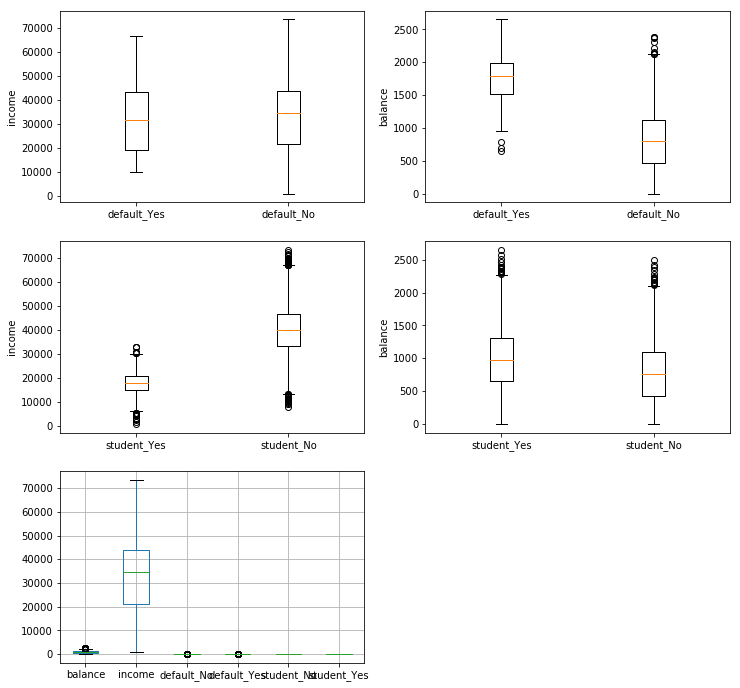

In [4]:
#Boxplots of all varaibles 
fig = plt.figure()
fig.set_figwidth(fig.get_figwidth() * 2.0)
fig.set_figheight(fig.get_figheight() * 3.0)

#Income vs. default Boxplot
ax1 = plt.subplot(3,2,1)
ax1.boxplot([df.income[df.default == 'Yes'], df.income[df.default == 'No']])
ax1.set_xticklabels(('default_Yes', 'default_No'))
ax1.set_ylabel('income')

#Balance vs. default Boxplot
ax2 = plt.subplot(3,2,2)
ax2.boxplot([df.balance[df.default == 'Yes'], df.balance[df.default == 'No']])
ax2.set_xticklabels(('default_Yes', 'default_No'))
ax2.set_ylabel('balance')

#Income vs. student Boxplot
ax3 = plt.subplot(3,2,3)
ax3.boxplot([df.income[df.student == 'Yes'], df.income[df.student == 'No']])
ax3.set_xticklabels(('student_Yes', 'student_No'))
ax3.set_ylabel('income')

#Balance vs. student Boxplot
ax4 = plt.subplot(3,2,4)
ax4.boxplot([df.balance[df.student == 'Yes'], df.balance[df.student == 'No']])
ax4.set_xticklabels(('student_Yes', 'student_No'))
ax4.set_ylabel('balance')


#Boxplot comparing all variables 
ax5 = plt.subplot(3,2,5)
df_final.boxplot()
plt.show()

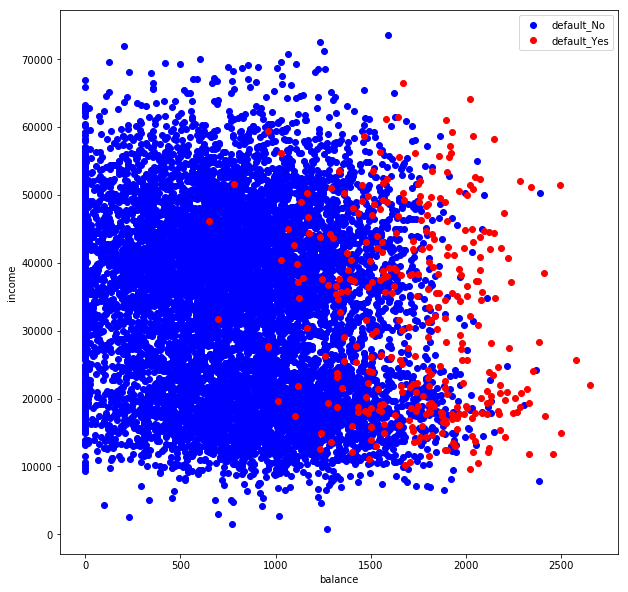

In [5]:
#Scatterplot of income vs. balance
plt.figure(figsize=(10, 10))
plt.scatter(x=df.balance[df.default == 'No'], y=df.income[df.default == 'No'],c='b', label='default_No')
plt.scatter(x=df.balance[df.default == 'Yes'], y=df.income[df.default == 'Yes'],c='r',label='default_Yes')

plt.xlabel('balance')
plt.ylabel('income')
plt.legend()
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

Area under the ROC curve : 0.960453


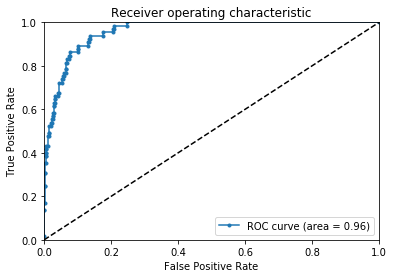

In [6]:
from sklearn.model_selection import train_test_split
X = df_final[['balance', 'income']]
y = df_final.default_Yes

# computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds, classifier

def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

# generate ROC  for LR with l1 penalty and C=0.1
fpr, tpr, roc_auc, thresholds, clf = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')

# plot ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

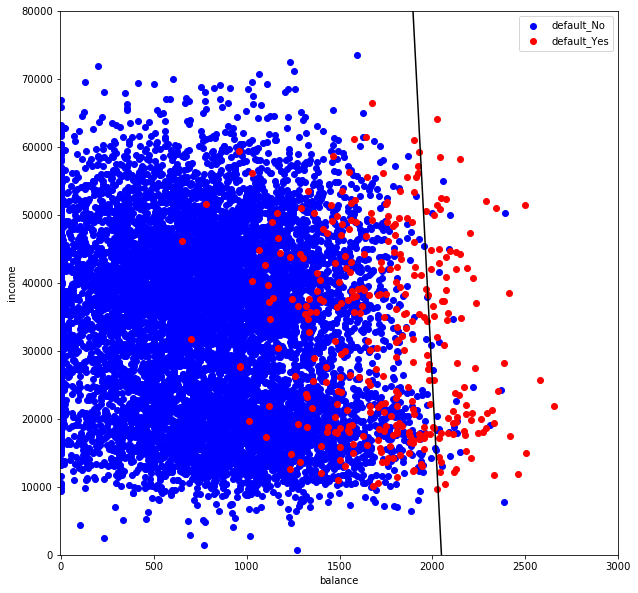

In [7]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 3000)
yy = a * xx - (clf.intercept_[0]) / w[1]

f, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=df.balance[df.default == 'No'], y=df.income[df.default == 'No'],c='b', label='default_No')
plt.scatter(x=df.balance[df.default == 'Yes'], y=df.income[df.default == 'Yes'],c='r',label='default_Yes')

ax.plot(xx, yy, 'k-')
ax.set(xlim=(-5, 3000), ylim=(0, 80000),
       xlabel="balance", ylabel="income")
plt.legend()
plt.show()


5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking
of coefficients.  How does performance improve with the added variable?

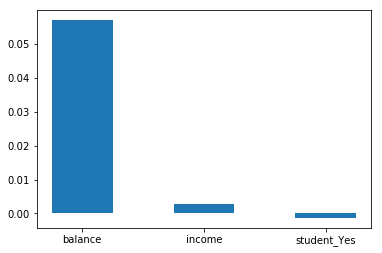

Area under the ROC curve : 0.961034


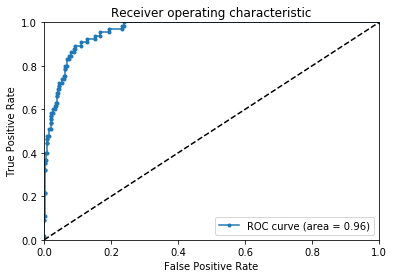

In [8]:
from sklearn.linear_model import Ridge

X = df_final[['balance', 'income','student_Yes']]
y = df_final.default_Yes
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge regression
alphas = np.logspace(-8,3,100)
scores = []

for alpha in alphas:
    regr = Ridge(alpha=alpha)

    # Train the model using the training sets
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
    
i_alpha_optim = np.argmax(scores)
alpha_optim = alphas[i_alpha_optim]

#plot ranking of coefficients
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(np.arange(3), regr.coef_, 0.5)
ax.set_xticks(np.arange(3))
ax.set_xticklabels(('balance', 'income', 'student_Yes'))
rects = ax.patches
plt.show()

fpr, tpr, roc_auc, thresholds, clf= generate_auc(X,y,LogisticRegression,C=alpha_optim ,penalty='l2')
generate_ROCplot(fpr,tpr,'LR',roc_auc)

**Comment**

We see the coefficient of balance is much larger than coefficient of the other two features. Coeffcient for student varaible is negative. Balance is the most important feature.

According to the AUC ROC, we can see that after using Ridge regression with added variables, the value changes from 0.960437 to 0.961018, which increases a little bit. So, the performance is slightly better.


6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

[ 0.97551224  0.97351324  0.971       0.97248624  0.97348674]


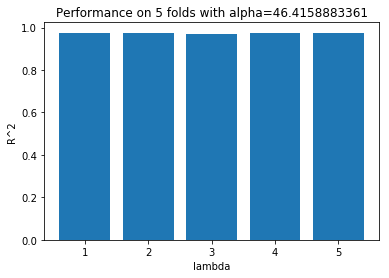

In [9]:
from sklearn.model_selection import cross_val_score
X = df_final[['balance', 'income','student_Yes']]
y = df_final.default_Yes
scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)


regr = LogisticRegression(C=alpha_optim, penalty='l2')
scores = cross_val_score(regr, X, y, cv=5)
print(scores)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with alpha=' + str(alpha_optim))
plt.bar(range(1,6),scores)
plt.show()

**Comment**: Our model built in 5 is robust, because the R^2 value for each cross validation fold is close to 1.

Area under the ROC curve : 0.955152


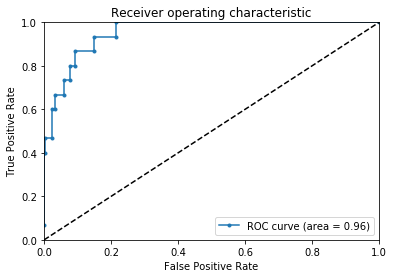

Area under the ROC curve : 0.970043


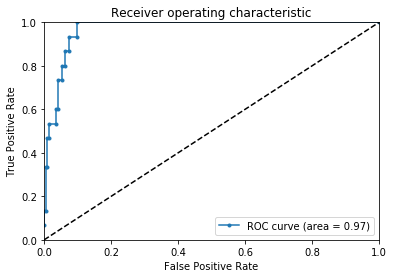

Area under the ROC curve : 0.960256


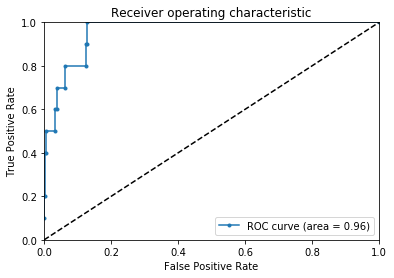

Area under the ROC curve : 0.954315


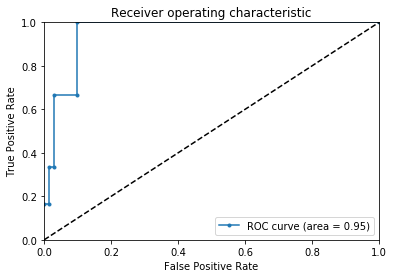

Area under the ROC curve : 0.956615


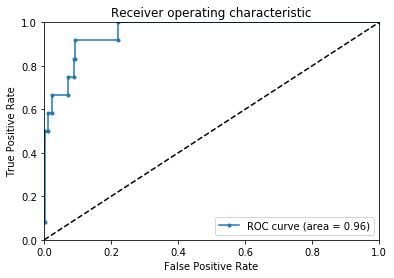

In [10]:
X = df_final[['balance', 'income','student_Yes']]
y = df_final.default_Yes

scaler = StandardScaler()
X = X.as_matrix().astype(np.float)
X = scaler.fit_transform(X)

rand = [10, 30, 50, 70, 90]

for r in rand:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=r)
    fpr, tpr, roc_auc, thresholds, clf = generate_auc(X_test,y_test,LogisticRegression,C=alpha_optim,penalty='l2')
    generate_ROCplot(fpr,tpr,'LR',roc_auc)

**Comment**:
This again shows that the model built in 5 is robust because it gives high AUC ROC near 1 for each random case. So, it generalizes well to random data sets.

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [11]:
from sklearn.tree import DecisionTreeClassifier
from __future__ import print_function
import os
import subprocess
from IPython.display import Image
import numpy.random as nprnd

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydotplus


def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

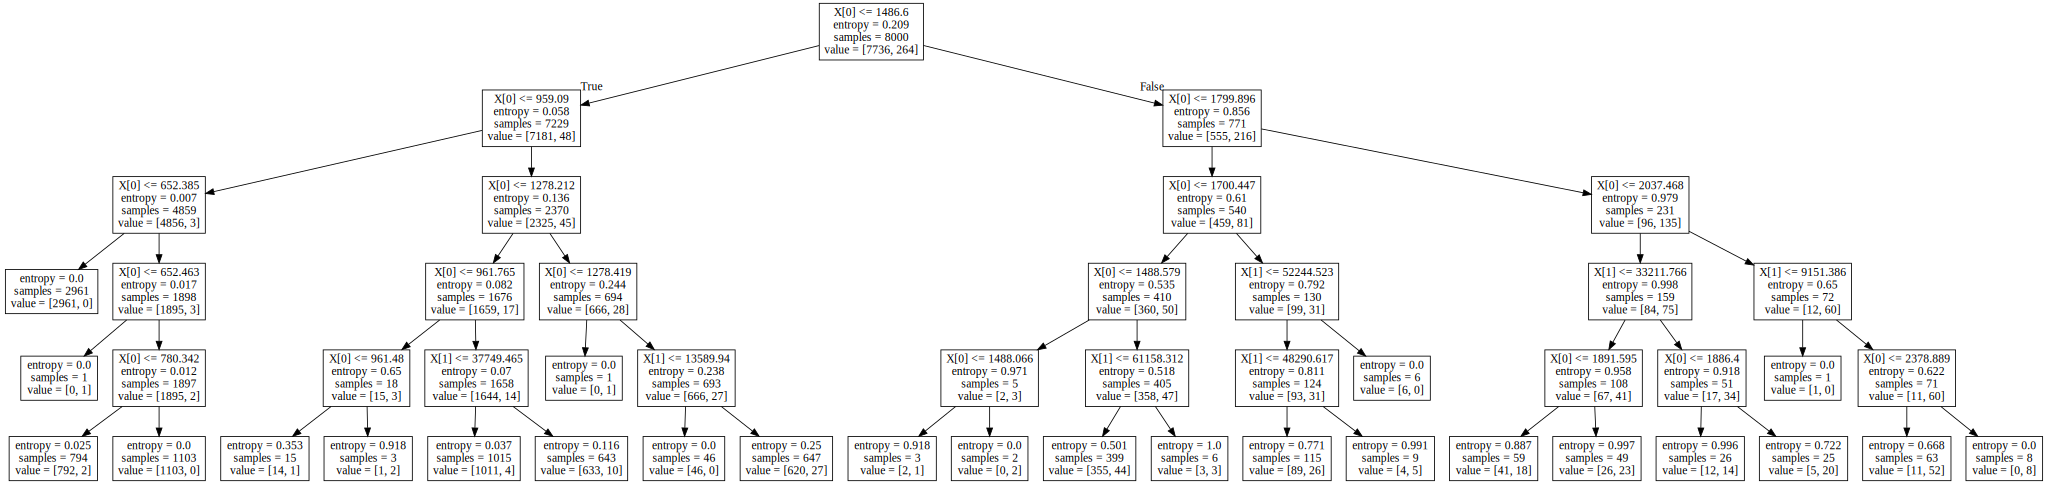

In [12]:
X = df_final[['balance', 'income','student_Yes']]
y = df_final.default_Yes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg_tree = DecisionTreeClassifier(criterion='entropy',  max_depth=5)
reg_tree.fit(X_train, y_train)

dot_data=export_graphviz(reg_tree, out_file='Reg_Tree.dot')
with open("Reg_Tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph, format='png')


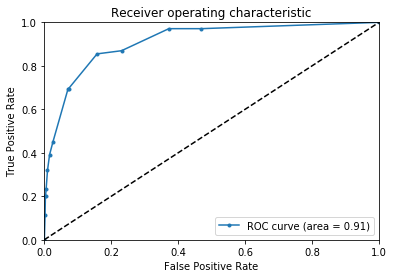

In [13]:
reg_opt = DecisionTreeClassifier(criterion='entropy', max_depth= 5)
reg_opt.fit(X_train,y_train)
probas_ = reg_opt.predict_proba(X_test)    
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr,tpr)
generate_ROCplot(fpr,tpr,'LR',roc_auc)

**Comment**: The AUC ROC with tree depth of 5 is 0.91, which is less than 0.96 we got previously from the ridge regression. So, its performance is not as good as ridge regression.

8) Find the optimal decision tree depth and compute the AUC ROC. 

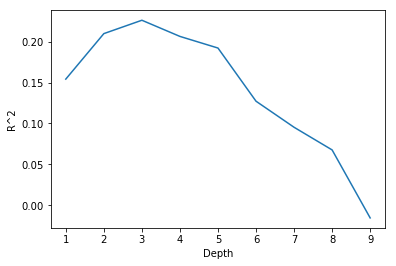

The optimal decision tree depth is 3


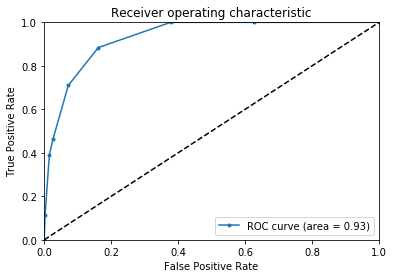

In [14]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,10)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
    
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
plt.show()
test_errors=scores
n_opt=depths[np.argmax(scores)]
print ("The optimal decision tree depth is",n_opt)

reg_opt = DecisionTreeClassifier(criterion='entropy', max_depth= n_opt)
reg_opt.fit(X_train,y_train)
probas_ = reg_opt.predict_proba(X_test)    
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr,tpr)
generate_ROCplot(fpr,tpr,'LR',roc_auc)

**Comment**

The optimal tree depth is 3. Its AUC ROC is 0.93 with this optimal depth. But, it is still not as good as the 0.96 AUC ROC we got for the ridge regression. So, the ridge regression is the best method from this dataset.

# Part II: Recommendation Systems. 

In this problem we will use the notebook https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/matrix_factorization_recommender.ipynb  as
a starting point.

1) Split the ratings matrix `R_df` into training and testing sets. Remember we need to do this for rows and columns now. 

2) Evaluate the performance of the matrix factorization model for $K=50$. In particular, measure the:
 - Precision.
 - Recall. 

You can round up or down to the nearest integer for the ratings. 

3) Construct an item/item and user/user model, and evaluate the performance as in 2). How does it compare?

4) Check how your answer to 3) changes (if at all) as you try different values of K for K=10, 20, 100. 